# Техническое задание.

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

# Маркетинговый анализ предложенных мероприятий для увеличения выручки интернет-магазина.

## Введение.

### Краткое описание проекта.
Вместе с отделом маркетинга разработаны 9 гипотез для увеличения выручки интернет-магазина. Гипотезы необходимо приоретизировать, проанализировать выбранные первоочередные или самые перспективные в плане увеличения выручки. Главная задача -сэкономить ресурсы предприятия и увеличить выручку в конечном итоге. Для этого предлагаемые мероприятия требуют детального анализа.Это дорогостоящее предприятие. Поэтому проверять будем только самые перспективные.

### Цель проекта.
Проект состоит из двух частей:
-  В первой части необходимо приоретизировать гипотезы, выявить самые перспективные для последующей проверки. Обосновать сделанные выводы.
-  Во второй части необходимо запустить А/В тест и сделать анализ полученного результата.

### Описание данных.
- Для части 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
- Для части 2. Анализ A/B-теста.
Результаты A/B-теста описанные в файлах /datasets/orders.csv и /datasets/visitors.csv.


### План работы.

Часть 1.
- Загрузка данных и подготовка их к анализу.
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Выявить, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Часть 2.
- Загрузка данных и подготовка их к анализу.
- Для анализа А/В теста необходимо решить следующие задачи:
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
5. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
6. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
7. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
8. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
9. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
10. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
13. Принять решение по результатам теста и объяснить его. Варианты решений:
- А. Остановить тест, зафиксировать победу одной из групп.
- Б. Остановить тест, зафиксировать отсутствие различий между группами.
- В. Продолжить тест.

## Выполнение проекта. 

### Часть 1. Приоретизация гипотез.

In [1]:
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import math as mth
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
# Загрузим данные для изучения
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
# приведём названия колонок к нижнему регистру
data.columns = data.columns.str.lower()

print(data)

# если датафрейм не выводятся целиком использовать код
#pd.set_option('display.max_columns',None)
# или pd.set_option('display.max_colwidth', False)

                                          hypothesis  reach  impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   
5  Добавить страницу отзывов клиентов о магазине,...      3       2   
6  Показать на главной странице баннеры с актуаль...      5       3   
7  Добавить форму подписки на все основные страни...     10       7   
8  Запустить акцию, дающую скидку на товар в день...      1       9   

   confidence  efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
5           2        3  
6           8        3  
7           8        5  
8           9        5  


In [3]:
#применим фреймворк ICE для приоритизации гипотез, 
#отсортируем их по убыванию приоритета.
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
print(round(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False),2))

                                          hypothesis    ICE
8  Запустить акцию, дающую скидку на товар в день...  16.20
0  Добавить два новых канала привлечения трафика,...  13.33
7  Добавить форму подписки на все основные страни...  11.20
6  Показать на главной странице баннеры с актуаль...   8.00
2  Добавить блоки рекомендаций товаров на сайт ин...   7.00
1  Запустить собственную службу доставки, что сок...   2.00
5  Добавить страницу отзывов клиентов о магазине,...   1.33
3  Изменить структура категорий, что увеличит кон...   1.12
4  Изменить цвет фона главной страницы, чтобы уве...   1.00


In [4]:
# Применим фреймворк RICE для приоритизации гипотез.
# Отсортируем их по убыванию приоритета.
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
print(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


### Вывод по части 1. 
Для приоретизации гипотез мы использовали методы ICE и RICE. Задача - посмотреть на место гипотез среди остальных при применении разных методов приоретизации.
- При применении ICE явно лидируют гипотезы 8, 0 и 7. Почти в 2 раза отстают от них гипотезы 6 и 2.
- При применении RICE явно лидирует гипотеза 7. Почти в 2 раза отстают от неё гипотезы 2, 0 и 6. 
- Гипотеза 8, которая была безусловным лидером при оценке методом ICE, при оценке методом RICE оказалась только на пятом месте. Так произошло потому, что параметр reach гипотезы 8 очень низкий - предлагаемая акция будет актуальной для покупателей только раз в году. Кроме того, сама по себе акция тоже нуждается в рекламировании, что повлечёт за собой дополнительные затраты. При этом параметр reach гипотезы 7 - самый высокий, поэтому гипотеза в числе лидеров в приоретизации обоими методами.

**Рекомендации для отдела маркетинга**
- Протестировать гипотезу под номером 7.
- При наличии возможностей задействовать материальные и людские ресурсы - протестировать также гипотезы 0, 6 и 2.


## Часть 2.  Анализ A/B-теста.

### Подготовка данных к анализу.

In [5]:
# загрузим данные и подготовим их к анализу
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print(orders)
orders.info()
orders.duplicated().sum()

      transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     1650     B
1        2804400009  3642806036 2019-08-15      730     B
2        2961555356  4069496402 2019-08-15      400     A
3        3797467345  1196621759 2019-08-15     9759     B
4        2282983706  2322279887 2019-08-15     2308     B
...             ...         ...        ...      ...   ...
1192     2662137336  3733762160 2019-08-14     6490     B
1193     2203539145   370388673 2019-08-14     3190     A
1194     1807773912   573423106 2019-08-14    10550     A
1195     1947021204  1614305549 2019-08-14      100     A
1196     3936777065  2108080724 2019-08-15   202740     B

[1197 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      

0

In [6]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
print(visitors)
visitors.info()
visitors.duplicated().sum()

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
..        ...   ...       ...
57 2019-08-27     B       720
58 2019-08-28     B       654
59 2019-08-29     B       531
60 2019-08-30     B       490
61 2019-08-31     B       718

[62 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


0

In [7]:
# выясним,есть ли пользователи, попавшие в обе группы сразу
visitor_doubles = orders.groupby(['visitorId']).agg({'group' : 'nunique'}).reset_index()
# выведем результат на экран
print(f'Пользователей, попавших в обе группы: {visitor_doubles[visitor_doubles.group != 1]["visitorId"].count()}')


Пользователей, попавших в обе группы: 58


Таким образом, 58 пользователей попали в обе группы сразу. Понять, какая из версий сайта повлияла на их решение и покупки, не представляется возможным. Хорошо было бы их удалить, но тогда мы получим разночтения со второй таблицей - там нет колонки с ID пользователей. Поэтому оставим этих пользователей в таблице. Хорошо, что их не много.

#### Вывод. 
Названия столбцов корректны, изменять их нет необходимости. Формат ячеек date в обеих таблицах был изменён с object на datetime. Выявлены пользователи, попавшие в обе группы теста. Данные этих пользователей, к сожалению, нельзя исключить из дальней обработки.

### Анализ  А/В теста.

#### Анализ кумулятивных метрик.

Построим график кумулятивной выручки по группам.

In [8]:
# Построим график кумулятивной выручки по группам
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),\
    axis=1).sort_values(by=['date','group']
) 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


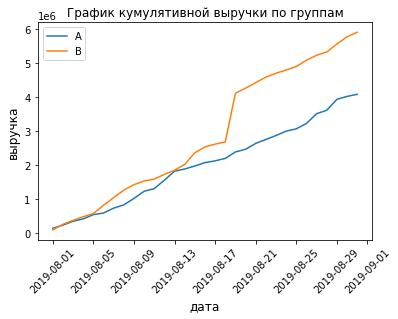

In [9]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('дата',fontsize=12)
plt.ylabel('выручка',fontsize=12)
plt.xticks(rotation = 45)
plt.title('График кумулятивной выручки по группам',fontsize=12)
plt.legend() 

**Вывод:**
выручка обеих групп стабильно растёт на протяжении всего теста. В группе во второй половине теста есть резкий всплеск. Возможно,есть аномально большие заказы. при заключительном анализе их нужно будет удалить.

Построим график кумулятивного среднего чека по группам. 

Text(0.5, 1.0, 'График кумулятивного среднего чека по группам')

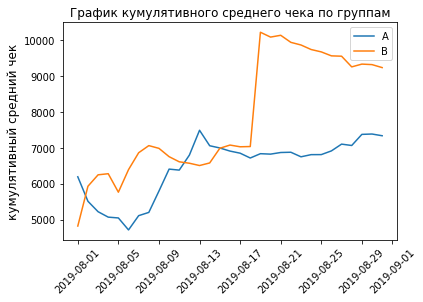

In [10]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.ylabel('кумулятивный средний чек',fontsize=12)
plt.xticks(rotation = 45)
plt.legend() 
plt.title('График кумулятивного среднего чека по группам',fontsize=12)

**Вывод.** 
Кумулятивное значение среднего чека в обеих группах колеблется. В группе А после падения в начале теста значение среднего чека растёт и стабилизируется. В группе В есть резкий всплеск в середине теста. Возможно, здесь естьаномально крупные заказы. Требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Text(0.5, 1.0, 'Относительное изменение кумулятивного среднего чека группы B к группе A')

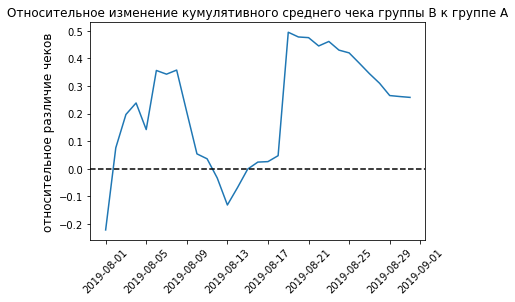

In [11]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/
    mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/
    mergedCumulativeRevenue['ordersA'])-1
        )

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('относительное различие чеков',fontsize=12)
plt.xticks(rotation = 45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A',fontsize=12)

**Вывод.**
Результаты теста значительно и резко менялись в несколько дат. Возможно,именно тогда были сделаны аномально большие заказы. Стоит проверить 6-7 августа и 20 августа.

Построим график кумулятивного среднего количества заказов на посетителя по группам. 

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

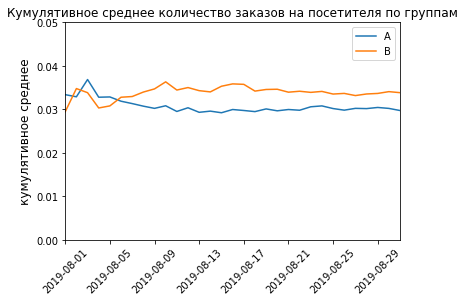

In [12]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя по группам',fontsize=12)
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.ylabel('кумулятивное среднее',fontsize=12)
plt.xticks(rotation = 45)

**Вывод.** 
В начале теста сегмент А показывал значение кумулятивнго среднего количества заказов в расчёте на посетителя выше того же значения сегмента В. Однако сегмент В постепенно выровнялся и этот его показатель стал стабильно выше аналогичного показателя сегмента А.
Мы изменили масштаб графика,чтобы было видно, что абсолютное значение колебаний в начале и в конце теста не слишком большое.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

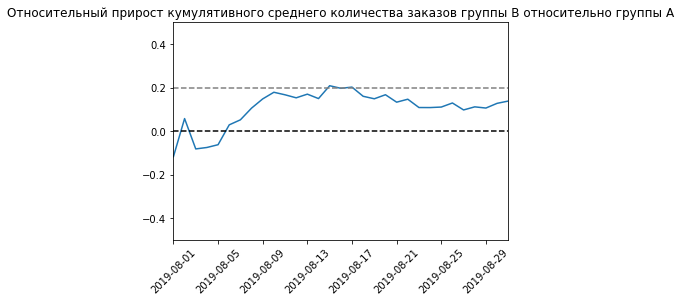

In [13]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.plot(
    mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
    mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A"
)
plt.title('Относительный прирост кумулятивного среднего количества заказов группы В относительно группы А',fontsize=12)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5])
plt.xticks(rotation = 45)

**Вывод.** 
Первую неделю тестирования кумулятивное среднее количество заказов на посетителя группы B было меньше, чем у посетителя группы А. Затем значение этого параметра стало стабильно расти и зафиксировалось на уровне 15-20%. Показатели группы В стабильно выше показателей группы А на протяжении последних трёх недель теста.

#### Анализ выбросов и всплесков.

Построим точечный график количества заказов по пользователям. 

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
# посчитаем количество заказов по пользователям
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsers.columns = ['visitorId','orders']
print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Text(0.5, 1.0, 'График количества заказов по пользователям')

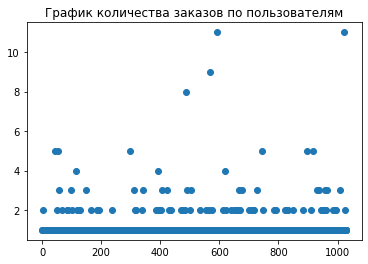

In [16]:
#Построим диаграмму методом scatter()
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям',fontsize=12)

**Вывод.** 
Пользователей, сделавших более 2-х заказов мало. Они вполне могут быть аномальными.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [17]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
prc = np.percentile(ordersByUsers['orders'], [95,99]).astype(int)
prc

array([2, 4])

**Вывод.** 
Абсолютное большинство пользователей сделали только 1 заказ. 2 заказа приходится только на 95-й перцентиль. Следовательно, пользователей с 2-мя, 3-мя и 4-мя заказами можно считать аномальными.

Построим точечный график стоимостей заказов. Сделать выводы и предположения.

Text(0.5, 1.0, 'График стоимостей заказов')

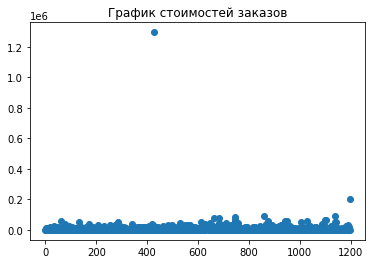

In [18]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов',fontsize=12)

**Вывод.**
Заказ стоимостью 200 000 у.е. всего 1. Основная масса заказов - гораздо дешевле. Виден аномально большой заказ - его стоимость выше 1, млн.у.е. Необходимо найти выборочные перцентили.

In [19]:
# Посчитаем 95-й и 99-й перцентили стоимости заказов.
prcn = np.percentile(orders['revenue'], [95,99]).astype(int)
prcn

array([28000, 58233])

**Вывод.**
Аномальными можно считать заказы стоимостью выше 28 000 у.е.

#### Статистический анализ.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
Сделаем выводы и предположения.
**Сформулируем гипотезы.**
- Нулевая: различий в среднем количестве заказов между группами нет.
- Альтернативная: различия в среднем между группами есть.

In [20]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']
    .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0
)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']
    .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0
)
print(f'P-value = ' "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))


print(
    f'Различие в среднем количестве заказов между группами: '
    "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA']
    .sum()/data['visitorsPerDateA'].sum())-1)
)

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

**Вывод.**
- P-value значительно меньше, чем 0,05. Поэтому нулевую гипотезу отвергаем. 
- Различия в среднем количестве заказов на посетителя по "сырым" данным между группами есть.
- Относительный прирост среднего группы В относительно группы А составляет 13,8%

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
**Сформулируем гипотезы.**
- Нулевая: различий в среднем чеке заказов между группами нет.
- Альтернативная: различия в среднем чеке заказов между группами есть.

In [21]:
print(
    f'P-value = ''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A'][
    'revenue'], orders[orders['group']=='B']['revenue'])[1])
)
print(
    f'Различие в среднем количестве заказов между группами: '
    '{0:.3f}'.format(orders[orders['group']=='B']['revenue']
    .mean()/orders[orders['group']=='A']['revenue'].mean()-1)
) 

P-value = 0.729
Различие в среднем количестве заказов между группами: 0.259


**Вывод.**
- P-value значительно выше, чем 0,05. Поэтому нулевую гипотезу не отвергаем. 
- Различие в среднем чеке на посетителя по "сырым" данным между группами отсутствует.Наблюдаемое различие не значимо, получено случайно из-за единичных выбросов.
- Относительное различие среднего группы В относительно группы А составляет 25,9%

#### Посчитаем статистическую разницу между группами по "очищенным" данным.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
Подготовим очищенные от аномалий данные.
**Сформулируем гипотезы.**
- Нулевая: различий в среднем количестве заказов между группами нет.
- Альтернативная: различия в среднем между группами есть.

In [22]:
# найдём аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > prc[0]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > prc[0]]['visitorId'],
    ],
    axis=0,
) 
usersWithExpensiveOrders = orders[orders['revenue'] > prcn[0]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64


In [23]:
# Посчитаем статистическую значимость различия среднего количества заказов после удаления аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print(f'P-value = ' '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print(
    f'Различие в среднем количестве заказов между группами: '
    '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)
) 

P-value = 0.013
Различие в среднем количестве заказов между группами: 0.173


**Вывод.**
По "очищенным" данным нулевая гипотеза также отвергается - P-value значительно меньше, чем 0,05. Различия в среднем количестве заказов на посетителя между группами есть.
Относительный прирост среднего группы В относительно группы А составляет 17,3%

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
**Сформулируем гипотезы.**
- Нулевая: различий в среднем чеке заказов между группами нет.
- Альтернативная: различия в среднем чеке заказов между группами есть.

In [24]:
print(
    f'P-value = '
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
     f'Различие в среднем количестве заказов между группами: '
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value = 0.738
Различие в среднем количестве заказов между группами: -0.020


**Вывод.** 
- Статистическая разница в среднем чеке заказа между группами по очищенным данным тоже отсутствует. 
- При этом относительный прирост среднего группы В относительно группы А отрицательный, он составляет - 2,0%, сильное влияние аномалий.

### Общие выводы по анализу А/В теста.
 
- Есть статистически значимое различие по конверсии между группами как по "сырым" данным, так и после фильтрации аномалий.
- При анализе очищенных от аномалий данных статистически значимое различие по среднему чеку между группами отсутствует, как и при анализе "сырых" данных. Такого различия между группами нет.
- График различия конверсии между группами показывает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека до фильтрации аномалий колеблется: именно благодаря ему мы нашли аномалии. Сделать из этого графика определённые выводы нельзя.

**Решение по результатам теста: тест можно остановить.** 
- Результаты группы В лучше результатов группы А.
- Средний чек пользователя группы В не отличается от среднего чека пользователя группы А. Как по "сырым", так и по "очищенным" данным.